In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
# This is the size of our encoded representations
encoding_dim = 32

# This is our input image
input_img = Input(shape=(784,))
e1 = Dense(256, activation='relu')(input_img)
e2 = Dense(128, activation='relu')(e1)
e3 = Dense(64, activation='relu')(e2)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(e3)
# "decoded" is the lossy reconstruction of the input
d1 = Dense(64, activation='sigmoid')(encoded)
d2 = Dense(128, activation='sigmoid')(d1)
d3 = Dense(256, activation='sigmoid')(d2)
decoded = Dense(784, activation='sigmoid')(d3)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.summary()
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 128)               8320

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
235/235 [==============================] - 2s 7ms/step - loss: 0.2753 - val_loss: 0.2492
Epoch 2/40
235/235 [==============================] - 2s 8ms/step - loss: 0.2430 - val_loss: 0.2383
Epoch 3/40
235/235 [==============================] - 2s 8ms/step - loss: 0.2362 - val_loss: 0.2326
Epoch 4/40
235/235 [==============================] - 2s 8ms/step - loss: 0.2240 - val_loss: 0.2160
Epoch 5/40
235/235 [==============================] - 2s 8ms/step - loss: 0.2090 - val_loss: 0.2006
Epoch 6/40
235/235 [==============================] - 2s 8ms/step - loss: 0.1963 - val_loss: 0.1918
Epoch 7/40
235/235 [==============================] - 2s 8ms/step - loss: 0.1893 - val_loss: 0.1860
Epoch 8/40
235/235 [==============================] - 2s 8ms/step - loss: 0.1826 - val_loss: 0.1766
Epoch 9/40
235/235 [==============================] - 2s 8ms/step - loss: 0.1732 - val_loss: 0.1689
Epoch 10/40
235/235 [==============================] - 2s 8ms/step - loss: 0.1661 - val_loss: 0.1620

In [19]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 710us/step


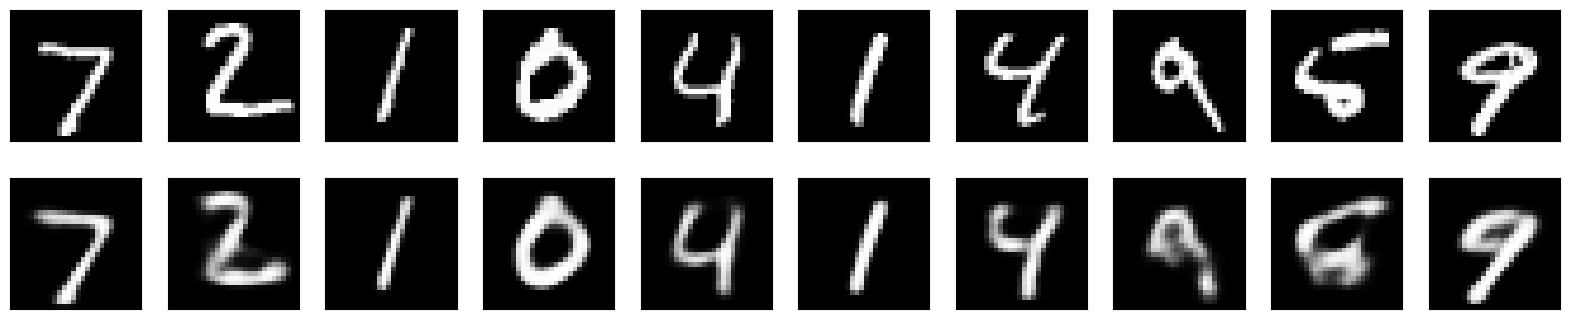

In [20]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()